## Exam on Machine Learning

### Name: Subhram Patel
### Roll: 19CSE260
### Department: CSE

## Import Required Libraries

In [24]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.labelsize']=15
matplotlib.rcParams['xtick.labelsize']=15
matplotlib.rcParams['ytick.labelsize']=15
matplotlib.rcParams['text.color']='#FF1493'
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve, auc

## Read Covid-19 data (2019_nCoV_data.csv)

In [2]:
df=pd.read_csv('2019_nCoV_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Russia                              30251
US                                  26740
Japan                               18059
Mainland China                      15758
India                               13182
Colombia                            12503
Mexico                              12282
Brazil                              10229
Ukraine                              9891
Peru                                 9625
Italy                                8105
Spain                                7718
Sweden                               7665
Canada                               6960
UK                                   6674
Germany                              6584
Chile                                6453
Netherlands                          5999
France                               5024
Australia                            3788
Belgium                              2670
Pakistan                             2583
Denmark                              1340
Hong Kong                         

In [3]:
df.drop('SNo',axis=1,inplace=True)

In [4]:
df.shape

(306429, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  306429 non-null  object 
 1   Province/State   228329 non-null  object 
 2   Country/Region   306429 non-null  object 
 3   Last Update      306429 non-null  object 
 4   Confirmed        306429 non-null  float64
 5   Deaths           306429 non-null  float64
 6   Recovered        306429 non-null  float64
dtypes: float64(3), object(4)
memory usage: 16.4+ MB


In [6]:
df.describe()

,Confirmed,Deaths,Recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


In [7]:
df.isna().sum()

ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

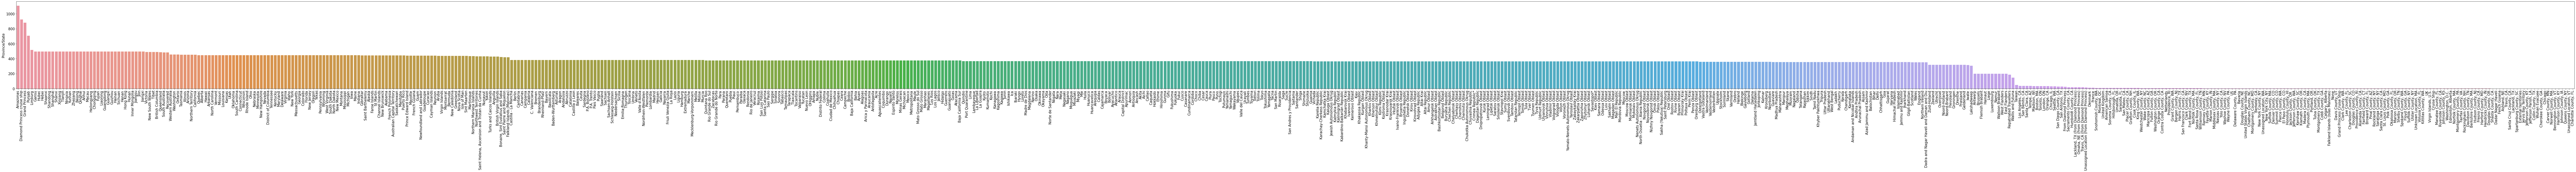

In [8]:
# print(df['Province/State'].value_counts())
fig,ax=plt.subplots(figsize=(200,7))
sns.barplot(x=df['Province/State'].value_counts()[1:].index,y=df['Province/State'].value_counts()[1:])
plt.xticks(rotation=90)
plt.show()

In [9]:
df['Province/State'] = df['Province/State'].fillna(df['Province/State'].mode()[0])

In [10]:
print(df['Province/State'].value_counts())

Unknown                         82223
Amazonas                         1109
Diamond Princess cruise ship      924
Grand Princess                    882
Punjab                            708
                                ...  
Harrison County, KY                 1
Johnson County, IA                  1
Queens County, NY                   1
Unassigned Location, VT             1
Charlotte County, FL                1
Name: Province/State, Length: 737, dtype: int64


In [11]:
df.isna().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

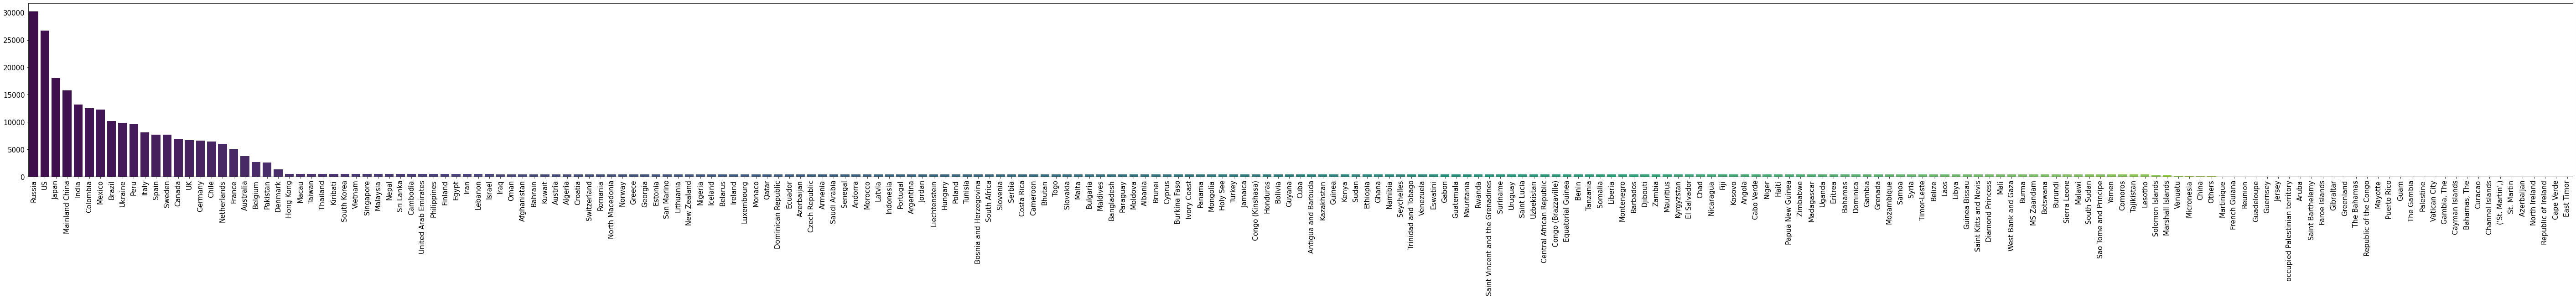

In [12]:
fig,ax = plt.subplots(figsize=(100,7))
sns.barplot(x=df['Country/Region'].value_counts().index,y=df['Country/Region'].value_counts().values,palette='viridis')
plt.xticks(rotation=90)
plt.show()

## Find the total number of Confirmed cases by Province

In [35]:
#Total number of Confirmed cases
df.Confirmed.sum()
confirmed=df['Confirmed'].value_counts().sum()
dfconf=pd.crosstab(df['Country/Region'],confirmed,colnames=['Confirmed'])
pd.set_option('display.max_rows',None)
dfconf.rename(columns={306429:df.Confirmed.sum()})

Confirmed,2.625205e+10
Country/Region,
Azerbaijan,1
"('St. Martin',)",1
Afghanistan,461
Albania,447
Algeria,460
Andorra,454
Angola,436
Antigua and Barbuda,443
Argentina,453


In [36]:
# fig = px.choropleth(df, locations="Country/Region",
#                     color="Confirmed",
#                     hover_name="Country/Region",
# #                     animation_frame="ObservationDate",
#                     title = "Covid Cases plotted using Plotly",
#                     color_continuous_scale=px.colors.sequential.PuRd)
# fig["layout"].pop("updatemenus")
# fig.show()

## Find the total number of Death cases by Province

In [42]:
#Total number of Death cases
df.Deaths.sum()
deaths=df['Deaths'].value_counts().sum()
df1conf=pd.crosstab(df['Country/Region'],deaths,colnames=['Deaths'])
pd.set_option('display.max_rows',None)
df1conf.rename(columns={306429:df.Deaths.sum()})

Deaths,624013017.0
Country/Region,
Azerbaijan,1
"('St. Martin',)",1
Afghanistan,461
Albania,447
Algeria,460
Andorra,454
Angola,436
Antigua and Barbuda,443
Argentina,453


## Find the total number of Recovered cases by Province

In [49]:
#Total number of Recovered cases
df.Recovered.sum()
Recovered=df['Recovered'].value_counts().sum()
df1conf=pd.crosstab(df['Country/Region'],df['Recovered'],colnames=['Recovered'])
pd.set_option('display.max_rows',None)
df1conf.rename(columns={306429:df.Recovered.sum()})

Recovered,-854405.0,-12684.0,-8072.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,...,5576026.0,5624444.0,5714557.0,5786915.0,5889896.0,5985047.0,6135314.0,6246605.0,6298082.0,6399531.0
Country/Region,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('St. Martin',)",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,0,0,0,21,9,6,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,12,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,11,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,11,4,7,0,3,4,11,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,32,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,11,3,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Plot the Confirmed cases by date

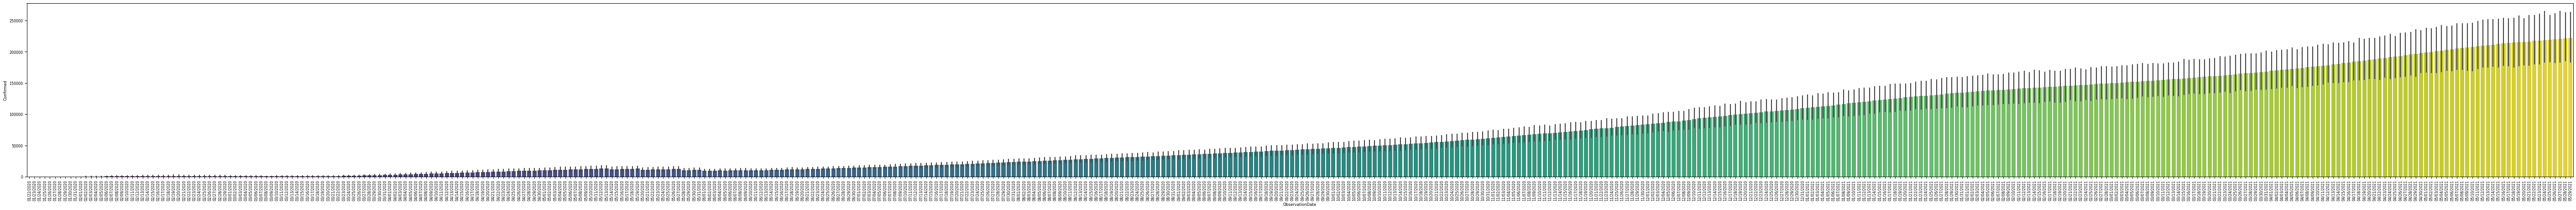

In [54]:
fig,ax = plt.subplots(figsize=(100,7))
fig1=sns.barplot(x=df['ObservationDate'],y=df['Confirmed'],palette='viridis')
sns.set_context("paper",font_scale=0.9)
fig1.tick_params(length=4,axis='x')
plt.xticks(rotation=90)
plt.show()

## Plot the Death cases by date

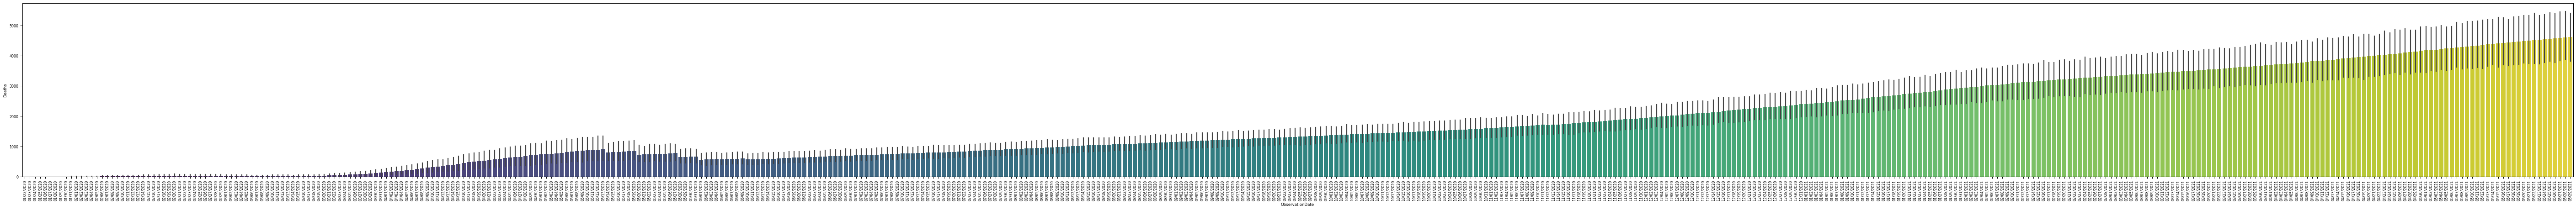

In [55]:
fig,ax = plt.subplots(figsize=(100,7))
fig1=sns.barplot(x=df['ObservationDate'],y=df['Deaths'],palette='viridis')
sns.set_context("paper",font_scale=0.9)
fig1.tick_params(length=4,axis='x')
plt.xticks(rotation=90)
plt.show()

## Calculate the Mortality rate (DEATH/CONFIRMED)

## PLot the Mortality rate

## Predict the Death using Regression (you can choose any regression algorithm)